# Final Project - SQL, Python, and Basic Analytics
MSDS 5013/DS 3213 - Lipscomb University

Vaughn Hines, Kun Zhao & Afua Mensah

## Questions and Hypothesis

How do the creatures’ medical diagnostics and earth-year age range differ based on each planet?
   - Because Boran and Radan are two completely different planets, the creatures on them will live two completely different lifestyles.
   - This will include different climates, different atmospheres, different societies, including governments/leadership, and different health conditions. This should be taken into account if this insurance wants to be implemented on other planets.


How do the non-human creatures’ medical diagnostics and earth-year age ranges on Boran and Radan differ compared to Earth’s human diagnostics and age range?
   - The range of data that PBHCICI is gathering from Bodan and Radan has to be somewhat familiar to the range of data values on Earth, for each column. If the data overall is out of their range of field, it would be quite difficult to implement and adapt the range of insurance to them because they would have to figure out what is normal and abnormal based on each respective planet, and not on Earth’s terms.
    
Will the dataset results of Boran and Radan be adaptable enough to be implemented on those planets?

**Hypothesis**: The results of the datasets on both Boran and Radan will differ greatly from each other and greatly from Earth to the point that PBHCICI would have do a lot of work to adapt to these planets, although the work is not impossible.

## Attribute Definitions

**Boran, Radan**

   - Patient_id – The identifier of each non-human creature on the planet, denoted as a 4-5 digit number. It is the primary key of both the Boran table and Radan table.
   - Blood pressure – The patient’s blood pressure measurement
   - Exercise – measure of the amount of exercise a patient is getting
   - Weight – measure of the patient’s weight
   - Glucose – measure of the patient’s blood sugar
   - BMI – Body mass index, measure of the patients weight (in grams) divided by the patient’s height (in meters)
   - Planet_id – the identifying number for each of the planets. Boran is 1, Radan is 2.

**deidentify_list_cross_ref**

  - Patient_id - The identifier of each non-human creature on the planet, denoted as a 4-5 digit number. It is a foreign key that references the primary key patient_id in the Boran table and Radan table. 
  - Age – the creature’s age in earth-year life

## Data Management Method: SQLite

## Create schemas for each table

    Schema for Boran:
<img src="https://i.ibb.co/J3Kxh2N/image.png" style="width: 500px;">

The patient_id attribute is the primary key since it is a unique number that is different for every patient on Boran.
It is an integer and not null due to its primary key constraint. blood_pressure through bmi is a real number. planet_id is an integer since it distinguishes each planet.
    
    Schema for Radan:
<img src="https://i.ibb.co/4f65RLV/image.png" style="width: 500px;">

The patient_id attribute is the primary key since it is a unique number that is different for every patient on Radan.
It is an integer and not null due to its primary key constraint. blood_pressure through bmi is a real number. planet_id is an integer since it distinguishes each planet.
    
    Schema for deidentify_list_cross_ref (renamed Cross_Ref for convenience purposes):
<img src="https://i.ibb.co/ZG9VBc7/image.png" style="width: 500px;">

The patient_id attribute here is a foreign key that references both the Boran and Radan table (not available in SQLite to do). Because of that, it is an integer. The age is a real number.

Data went into the tables through the importing a CSV file into a table method.

## Create the table to be exported into iPython
    Query used:
<img src="https://i.ibb.co/jrTmrs1/image.png" style="width: 500px;">

The first line has to be to create the table (We just gave it the name planets for convenience). Then a selection of all the attributes from Boran (besides patient_id) was made, and then it was joined by a selection of both attributes from the Cross_ref table. Both tables were joined using the common attribute patient_id. Then using union, the same thing was done to the Radan table. Then at the end, it was in ascending order of patient_id. 

    Here is the result of the table in SQLite:
<img src="https://i.ibb.co/BwDgfnJ/image.png" style="width: 600px;">

Then it was exported to a CSV file.

In [47]:
# Importing pandas to read data and numpy to read values, and plt for graphing the scatter plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
pd.options.display.max_columns = 50
pd.option_context('display.max_rows', 8)

In [48]:
# Loading the combination of Boran and Radan tables that was exported from SQLite into Python

BR = pd.read_csv('Planets.csv')
BR.head()

,patient_id,age,blood_pressure,exercise,weight,glucose,bmi,planet_id
0,5231,75.254768,194.639537,45.811801,145.294390,122.231550,1.005604,1
1,5502,78.425828,102.743158,43.031599,81.072209,77.593129,0.984347,2
2,8248,74.242965,189.628666,90.167716,139.689556,118.206986,0.972132,1
3,8495,79.982882,101.532439,84.264034,77.931413,75.550277,0.963410,2
4,8499,85.809577,104.635367,75.525589,82.481703,79.318150,1.021250,2


In [49]:
# This displays all of the values of each attribute in the table.

display(BR)

,patient_id,age,blood_pressure,exercise,weight,glucose,bmi,planet_id
0,5231,75.254768,194.639537,45.811801,145.294390,122.231550,1.005604,1
1,5502,78.425828,102.743158,43.031599,81.072209,77.593129,0.984347,2
2,8248,74.242965,189.628666,90.167716,139.689556,118.206986,0.972132,1
3,8495,79.982882,101.532439,84.264034,77.931413,75.550277,0.963410,2
4,8499,85.809577,104.635367,75.525589,82.481703,79.318150,1.021250,2
5,8733,83.774038,198.516635,121.005480,147.619907,124.711339,1.037849,1
6,12855,63.202458,176.546591,87.077072,127.240189,108.388378,0.877855,1
7,13650,84.932432,208.165225,24.415742,158.617524,132.525510,1.101654,1
8,13711,60.222563,168.038423,144.527709,118.051553,101.658343,0.819985,1
9,14617,89.363828,108.991343,17.586908,90.518182,85.299110,1.100477,2


In [50]:
BR.shape

(60, 8)

In [51]:
BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      60 non-null     int64  
 1   age             60 non-null     float64
 2   blood_pressure  60 non-null     float64
 3   exercise        60 non-null     float64
 4   weight          60 non-null     float64
 5   glucose         60 non-null     float64
 6   bmi             60 non-null     float64
 7   planet_id       60 non-null     int64  
dtypes: float64(6), int64(2)
memory usage: 3.9 KB


In [52]:
boran = BR.query('planet_id == 1')
radan = BR.query('planet_id == 2')

boran.describe()

,patient_id,age,blood_pressure,exercise,weight,glucose,bmi,planet_id
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,52421.300000,76.419431,193.632568,74.090198,143.812437,121.310649,1.000000,1.0
std,32425.383238,8.476798,10.744819,55.271606,10.642751,8.187990,0.076313,0.0
min,5231.000000,59.481521,168.038423,5.071321,118.051553,101.658343,0.819985,1.0
25%,19866.250000,70.286313,186.009547,28.702444,136.856140,115.683254,0.948012,1.0
50%,53724.500000,76.447460,195.145007,71.767815,145.439230,122.546964,1.009887,1.0
75%,83772.000000,84.757961,200.624363,97.071192,149.950593,126.364018,1.052331,1.0
max,94365.000000,87.262260,209.973069,228.903939,160.599282,133.964778,1.113857,1.0


In [53]:
radan.describe()

,patient_id,age,blood_pressure,exercise,weight,glucose,bmi,planet_id
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,50137.300000,84.217069,103.482301,84.427936,80.586650,77.832362,1.000000,2.0
std,29355.897729,6.977068,4.272000,58.333110,7.384564,5.624250,0.078524,0.0
min,5502.000000,71.826780,94.041680,2.288449,63.736353,65.268810,0.826296,2.0
25%,29286.000000,79.630264,100.863369,44.317002,75.429276,74.252706,0.951029,2.0
50%,45421.500000,82.166353,103.956240,65.899268,82.587375,79.129497,1.006779,2.0
75%,82619.500000,89.186006,106.606746,118.571410,85.190215,81.246692,1.059004,2.0
max,95788.000000,99.544450,111.513411,204.451010,92.276008,87.547651,1.149808,2.0


# Attribute Descriptions

**Boran**

   - Patient_id – Unique categorical variable. 4-5 digit number.
   - Age - Numerical variable, range (59.5, 87.3)
   - Blood pressure – Numerical variable, range (168.0, 209.9)
   - Exercise – Numerical variable, range (5.1, 228.9), abnormally large range
   - Weight – Numerical variable, range (118.0, 160.6)
   - Glucose – Numerical variable, range (101.6, 133.9)
   - BMI – Numerical variable, range (0.81, 1.11)
   - Planet_id – Categorical variable. An integer that auto-increments.

**Radan**
   - Patient_id – Unique categorical variable. 4-5 digit number.
   - Age - Numerical variable, range (71.8, 99.5)
   - Blood pressure – Numerical variable, range (94.0, 111.5)
   - Exercise – Numerical variable, range (2.3, 204.4), abnormally large range
   - Weight – Numerical variable, range (63.7, 92.3)
   - Glucose – Numerical variable, range (65.3, 87.5)
   - BMI – Numerical variable, range (0.83, 1.1)
   - Planet_id – Categorical variable. An integer that auto-increments.
   
### Observations
For both planets, the exercise level of each patient is extremely varied, looking at their ranges. There might be some outliers that skew the data because some of the patients work out a lot more than others, who most likely don't work out at all. The range for BMI on both planets is quite similar to each other, meaning their ratios of weight and height are similar, despite the two factors being different for each planet.

Text(0.5, 0, 'Age')

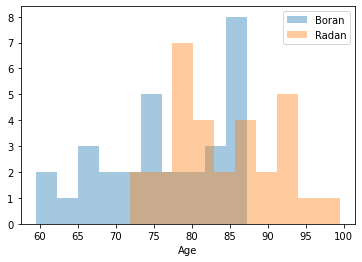

In [56]:
# Histogram for the earth-year life of planet Boran.

fig, ax = plt.subplots()
ax.hist(boran['age'], label='Boran', histtype='stepfilled', alpha=0.4)
ax.hist(radan['age'], label='Radan', histtype='stepfilled', alpha=0.4)
ax.legend()
ax.set_xlabel("Age")

On Boran, according to the dataset, patients in the 84-87 age range have the highest frequency while patients in the 62-65 age range have the lowest frequency. On Radan, patients in the 77-80 age range have the highest frequency while patients in the 94-99 age range have the lowest frequency. If the sample picked was representative of both populations, then although people on Radan tend to live a longer life in general, most of the population is younger than Boran's.

In [ ]:
print(type(BR.groupby('planet_id').age.mean()))
BR.groupby('planet_id').age.mean().to_frame()

On Boran planet, the average life expectance is 76.4 years old. On Radan planet, the average life expectance is 84.2. On Radan, a creature is much more likely to live a longer life in Earth life-years than on Boran. (This could be comparable to the difference between USA's life expectancy and Japan's life expectancy. Japanese people tend to live a much longer life on average than Americans do.)

What is the probability of a creature living past the mean life expectancy on each planet?

In [ ]:
PercentageBoran=(BR.age >76.419431) & (BR.planet_id==1)
PercentageBoran.sum()/30

There is a 50% of possibility of a creature living past the mean life expectancy on Boran.

In [ ]:
PercentageRadan=(BR.age >84.217069) & (BR.planet_id==2)
PercentageRadan.sum()/30

There is a 43% of possibility of a creature living past the mean life expectancy on Radan.

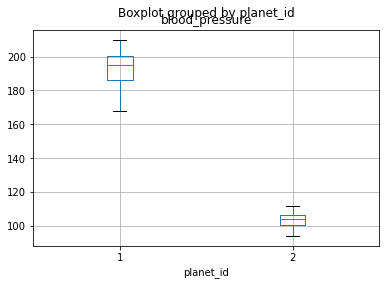

In [58]:
boxplot = BR.boxplot(['blood_pressure'], by='planet_id');

### Observations

The blood pressures of majority people on Boran are above 180mmHg which is too high according to the criteria of hypertension on earth. The blood pressures of all the people on Radan are lower than 120 mmHg which is normal according to the criteria of hypertension on earth. In general, the people on Boran have higher blood pressure than the people on Radan. However, the normal range of blood pressure in one population would not apply to another population. We can not conclude that the people on Boran are not favorable to people on Radan. It's orange-and-apple scenario.

Text(0.5, 0, 'BMI')

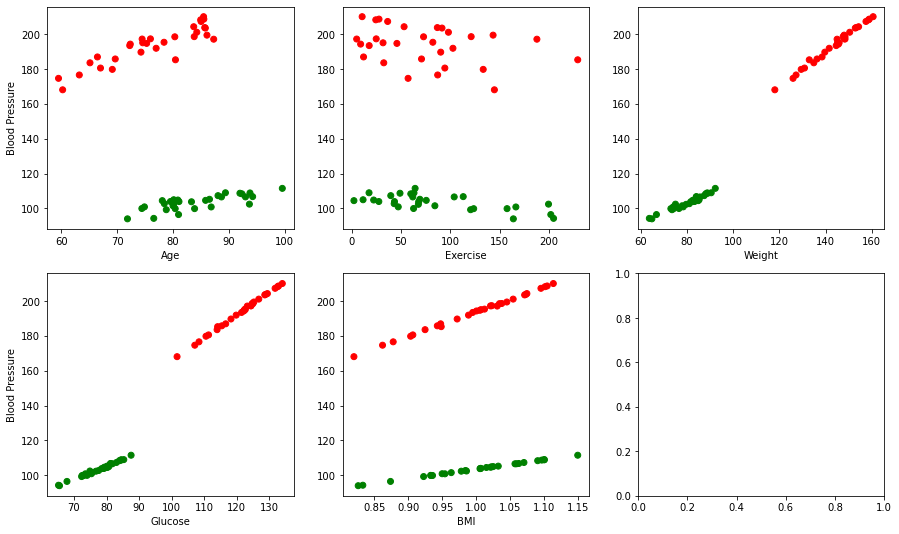

In [57]:
fig, ax = plt.subplots(2, 3, figsize=(15, 9))
colors = {1:'red', 2:'green'}

ax[0,0].scatter(BR['age'],BR['blood_pressure'], c=BR['planet_id'].map(colors) )
ax[0,0].set_ylabel('Blood Pressure')
ax[0,0].set_xlabel('Age')

ax[0,1].scatter(BR['exercise'],BR['blood_pressure'], c=BR['planet_id'].map(colors) )
ax[0,1].set_xlabel('Exercise')

ax[0,2].scatter(BR['weight'],BR['blood_pressure'], c=BR['planet_id'].map(colors) )
ax[0,2].set_xlabel('Weight')

ax[1,0].scatter(BR['glucose'],BR['blood_pressure'], c=BR['planet_id'].map(colors) )
ax[1,0].set_ylabel('Blood Pressure')
ax[1,0].set_xlabel('Glucose')

ax[1,1].scatter(BR['bmi'],BR['blood_pressure'], c=BR['planet_id'].map(colors) )
ax[1,1].set_xlabel('BMI')

## Findings

The blood pressure has a positive (although not as strong as other attributes) linear association with age for both Boran and Radan. The blood pressure has a strong positive linear association with weight, glucose level, and BMI for both Boran and Radan. The blood pressure has weak association with the exercise time as there is not much of a correlation to note for both Boran and Radan. If it could be estimated, there is a very very slight negative correlation for the relationship between exercise and blood pressure, very slight for Boran and even slighter for Radan. For blood pressure relating to age and BMI, the slope is not as steep as it is with blood pressure relating to weight and glucose for both planets. For blood pressure relating to exercise there is not much of a slope.

## Conclusions

The patients on both planets who are older in age, have a higher weight, higher glucose level and higher BMI are very quite likely to have a higher blood pressure. It is much more definite for relationships with steeper slopes like weight and glucose. However, the time of exercise is less likely associated with blood pressure. It can somewhat be shown that less exercise means a higher blood pressure for both planets, but it cannot be a definite conclusion since patients who have high exercise levels have high blood pressure as shown in the scatter plot. 


### Expectations between weight and BMI

I expect to see a strong positive linear association between weight and BMI.. This is because in general, the higher the patient's weight is, the higher the BMI, and because BMI is a ratio, this should ring true for the planets of Boran and Radan as it is for Earth. This is proven and shown below:


In [ ]:
fig, ax = plt.subplots()
colors = {1:'red', 2:'green'}
ax.scatter(BR['bmi'],BR['weight'], c=BR['planet_id'].map(colors) )

## Overall Thoughts

Overall, the hypothesis was proven to be somewhat correct. Looking at the ranges, Boran and Radan differ greatly on multiple attributes like blood pressure, weight, and glucose. This will mean PBHCICI will have to work harder to provide insurance that makes sure these attributes are at their normal range depending on the respective planet. Compared to Earth, on Boran, age, weight, and glucose levels are quite close on average to humans on Earth, so adapting to those attributes might not be as difficult if they follow Earth as a model. However, for blood pressure, that is not the case. They have to adapt to that range and that range only. For Radan, blood pressure is actually quite along the average for humans on Earth, making it quite adaptable. For age range, although it is not as high of a frequency overall on Earth as it is on Radan, it still might be adaptable. However, for weight and glucose, those can only be implemented in their own range without using Earth as a model. For both planets, BMI was quite similar to each other, which somewhat disproved my hypothesis. However, it is not on the level of a normal BMI on Earth. Exercise range was also very similar to each other in terms of wideness of the range, and I think it is very similar to Earth's. Humans are quite varied individually in their level of exercise, and that seems to be the same for both Boran and Radan as well. As explained here, parts of the hypothesis are correct, with some aspects being incorrect.